# week2 授業前課題１小麦とチェス盤問題

In [1]:
# sample code
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [22]:
# このリストにnp.array()を使うことで、ndarrayを作成することができます。
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))
# print(type(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [27]:
# 4行ベクトルを 2x2行列に変形
print(small_board_ndarray.shape)
small_board_ndarray.reshape(2, 2)

(4,)


array([[1, 2],
       [4, 8]])

## 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [170]:
# ndarrayで返す仕様は満たすが、自由に書いてみる
def chess_board_wheat(n, m):
    # 2で満たしたndarrayを作る
    two_list = np.full(n*m, 2)
    # 0~ n*m - 1 のndarrayを作る
    exp = np.arange(n*m)
    # べき乗したndarray 2^0 = 1, 2^1 = 2, 2^2 = 4,....
    # 2^64はint64ではオーバーフローとなるためuint64に型を変更
    nd_wheat = np.power(two_list, exp).astype(np.uint64) 
    # print(nd_wheat[63])
    # n*m行列に変換して返す
    return nd_wheat.reshape(n, m)

In [171]:
n = 8
m = 8
mat_wheat = chess_board_wheat(n, m)
# print(mat_wheat)
print("{}x{}マスのチェス盤の小麦の数は\n{}です\n合計は{}です".format(n ,m , mat_wheat, np.sum(mat_wheat)))  #行列の和 np.sum()

8x8マスのチェス盤の小麦の数は
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664   

## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

8x8マスのチェス盤の小麦の数の合計は18446744073709551615です
各列の平均は
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]です


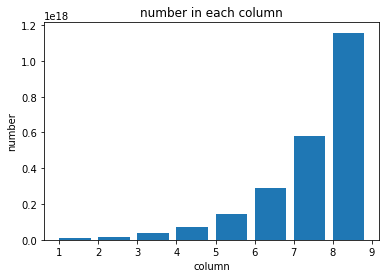

In [172]:
n = 8
m = 8
mat_wheat = chess_board_wheat(n, m)
print("{}x{}マスのチェス盤の小麦の数の合計は{}です".format(n, m, np.sum(mat_wheat)))  #行列の和 np.sum()
col_mean = np.mean(mat_wheat, axis=0)
print("各列の平均は\n{}です".format(col_mean))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, m + 1),col_mean, align="edge")
# x軸を整数にする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。

ヒートマップはサンプルコードを用意しています。

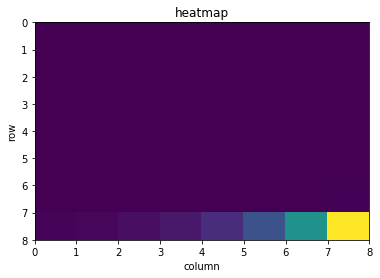

In [173]:
fig, ax = plt.subplots()
# y軸の反転
ax.invert_yaxis()
plt.pcolor(mat_wheat)
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.show()

## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [174]:
# print(mat_wheat)
row_sum = np.sum(mat_wheat, axis=1)
# print(row_sum[0] + row_sum[1] + row_sum[2] + row_sum[3])
# print(row_sum[4] + row_sum[5] + row_sum[6] + row_sum[7])
print("チェス盤の後半にある小麦の数は、前半にある小麦の数の\n{}倍です"
      .format((row_sum[4] + row_sum[5] + row_sum[6] + row_sum[7])/(row_sum[0] + row_sum[1] + row_sum[2] + row_sum[3])))

チェス盤の後半にある小麦の数は、前半にある小麦の数の
4294967296.0倍です


## 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [187]:
# np.append()を使う
def append_chess_board_wheat(n, m):
    n_squares = n*m
    chess_board_ndarray = []
    chess_board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        chess_board_ndarray = np.append(chess_board_ndarray, 2*chess_board_ndarray[-1]).astype(np.uint64)
    return chess_board_ndarray
    #print("{}x{}マスの板に小麦を並べる（ndarray）：{}".format(n, m, small_board_ndarray))

In [188]:
append_chess_board_wheat(8, 8)

array([                  1,                   2,                   4,
                         8,                  16,                  32,
                        64,                 128,                 256,
                       512,                1024,                2048,
                      4096,                8192,               16384,
                     32768,               65536,              131072,
                    262144,              524288,             1048576,
                   2097152,             4194304,             8388608,
                  16777216,            33554432,            67108864,
                 134217728,           268435456,           536870912,
                1073741824,          2147483648,          4294967296,
                8589934592,         17179869184,         34359738368,
               68719476736,        137438953472,        274877906944,
              549755813888,       1099511627776,       2199023255552,
             4398046

In [219]:
# ブロードキャストで求める
def broadcast_chess_board_wheat(n, m):
    # 0~ n*m-1 のndarrayを作る
    exp = np.arange(n*m)
    #print(exp)
    #print(2**exp)
    wheat = []
    wheat = (2**exp).astype(np.uint64)
    return wheat.reshape(n, m)

In [220]:
broadcast_chess_board_wheat(8, 8)

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。

%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [228]:
%%timeit
n, m  = 8, 8
n_squares = n*m
chess_board_ndarray = []
chess_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    chess_board_ndarray = np.append(chess_board_ndarray, 2*chess_board_ndarray[-1]).astype(np.uint64)

409 µs ± 9.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [229]:
%%timeit
n, m = 8, 8
# 0~ n*m-1 のndarrayを作る
exp = np.arange(n*m)
#print(exp)
#print(2**exp)
wheat = []
wheat = (2**exp).astype(np.uint64)

2.51 µs ± 35.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 結論：ブロードキャストの方がappendするより約160倍早い